In [44]:
from qiskit import *
import numpy as np
import math
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

N = 15
a = 13

math.gcd(a, N)

1

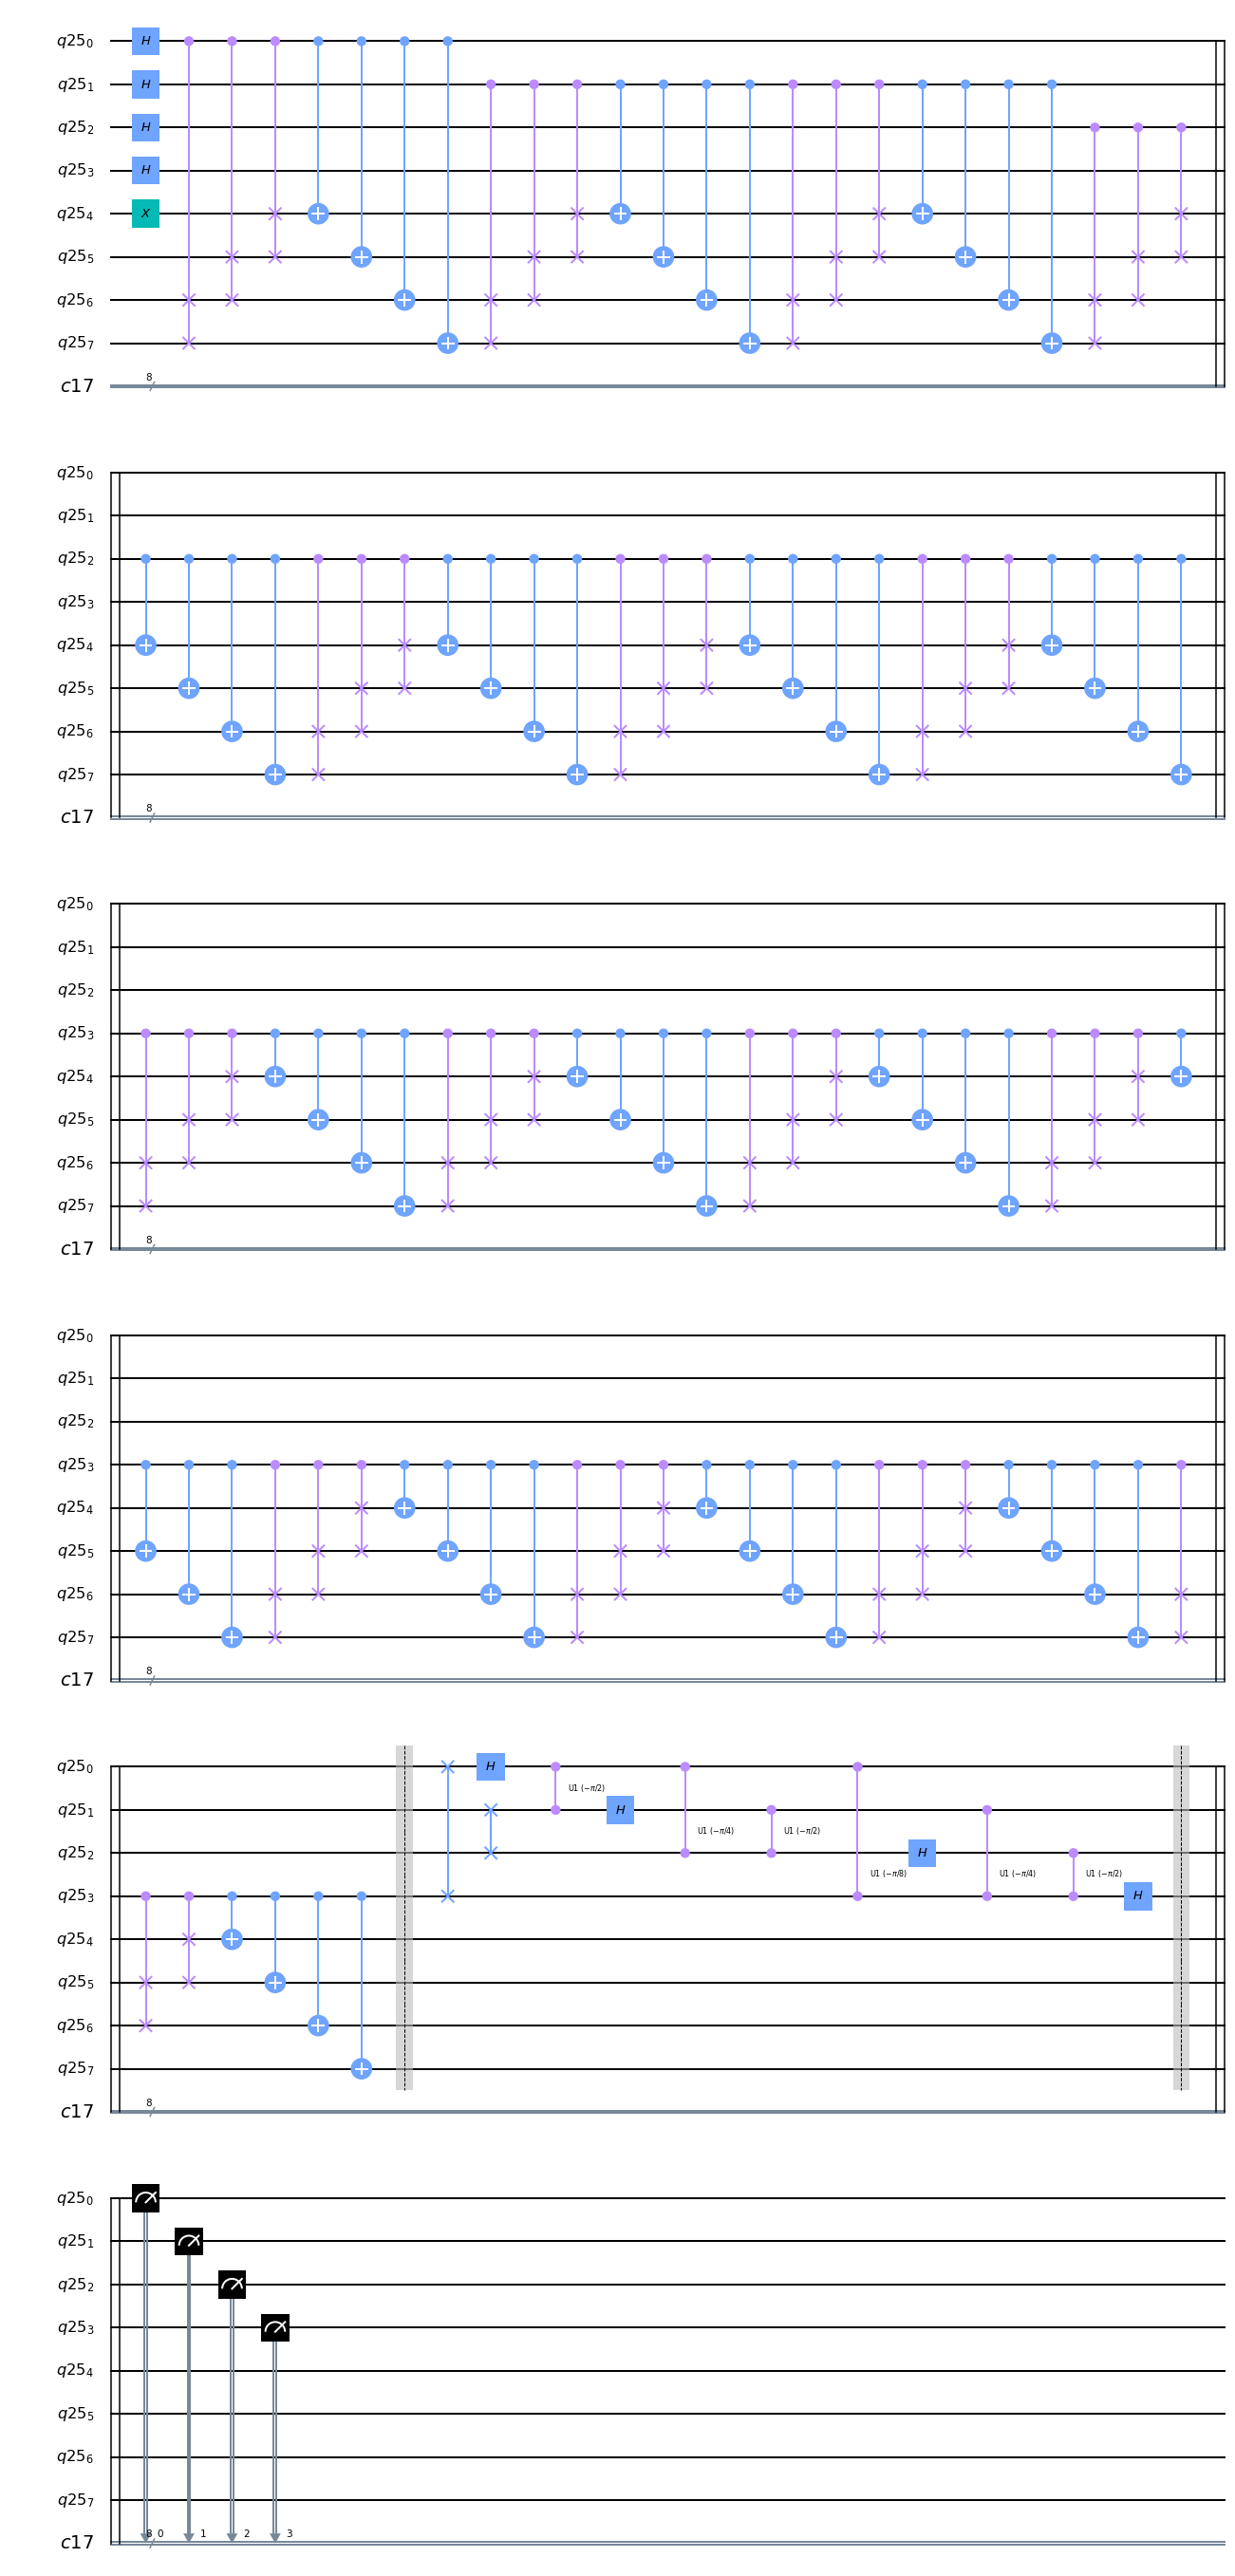

In [45]:
if a not in [2,7,8,11,13]:
    raise ValueError("'a' must be 2,7,8,11 or 13")
n = 4 # number of qubits needed to represent number that will be done prime factorization
qr = QuantumRegister(2*n) # Prepare 2*n quantum registers as |x>|w> = |x3 x2 x1 x0>|w3 w2 w1 w0>
cr = ClassicalRegister(2*n)
qc = QuantumCircuit(qr, cr)
# Hadamard gates
for i in range(n):
    qc.h(i)

# |w> -> |1>
qc.x(n)

# Implement U_f (f(x) = a^x (mod N))  U_f|x>|w> = |x>|w+f(x)> ("+" represents "XOR")
for i in range(n):
    for j in range(2**i):
        if a in [2,13]:
            qc.cswap(i, n+2, n+3)
            qc.cswap(i, n+1, n+2)
            qc.cswap(i, n+0, n+1)
        if a in [7,8]:
            qc.cswap(i, n+0, n+1)
            qc.cswap(i, n+1, n+2)
            qc.cswap(i, n+2, n+3)
        if a in [11]:
            qc.cswap(i, n+0, n+2)
            qc.cswap(i, n+1, n+3)
        if a in [7,11,13,14]:
            for k in range(n):
                qc.cx(i, n+k)
qc.barrier()

# Implement QFTdagger
for i in range(n//2): # Swap the qubits
    qc.swap(i, n-i-1)
    
for i in range(n):
    for j in range(i):
        qc.cu1(-np.pi/(2**(i-j)), j, i) 
    qc.h(i)
qc.barrier()

# Measure
qc.measure(range(n), range(n))

# Show quantum circuit
qc.draw(output='mpl', initial_state=True)      

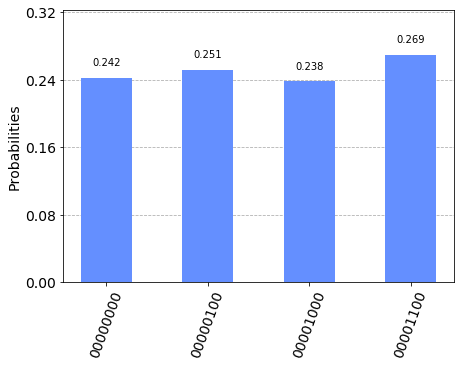

In [49]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots=1024).result()
plot_histogram(result.get_counts())